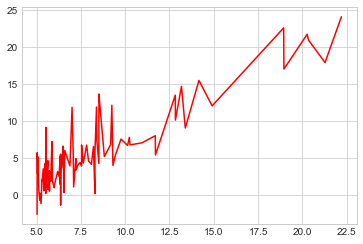

In [32]:
import os
import pandas as pd
import matplotlib.pyplot as plt 
plt.style.use('seaborn-whitegrid') 
import numpy as np
import random

df = pd.read_csv('data2.csv')
df = df.sort_values(df.columns[0], ascending = True)

x = df.iloc[:,0]
y = df.iloc[:,1]

plt.plot(x,y,'r')

In [21]:
def mse(m, w0, w1, x, y):
    return 1/m * sum([((w0 + w1 * x[i]) - y[i])**2 for i in range(m)])

MSE =  6.919163806316011


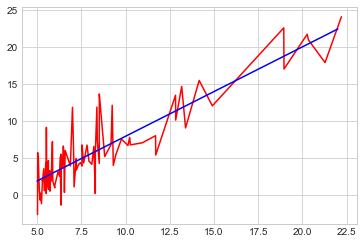

In [22]:
#y = w1 + w0*x

m = len(x)
Xb = np.c_[np.array(x), np.ones(m)]
Yb = y.values.reshape(m,1)

w = np.dot(np.linalg.inv(np.dot(Xb.T,Xb)),np.dot(Xb.T,y))

Xn = np.array([i for i in range(5,23)])
Yn = w[1] + w[0]*Xn

plt.plot(x,y,'r',Xn,Yn,'b')
print('MSE = ', mse(m,w[1],w[0],x,y))


In [67]:
#Gneerating test/train

Xtest = []
Ytest = []
Xtrain = []
Ytrain = []

for i in range(m):
    if random.uniform(0,1) < .2:
        Xtest = np.append(Xtest, x[i])
        Ytest = np.append(Ytest, y[i])
    else:
        Xtrain = np.append(Xtrain, x[i])
        Ytrain = np.append(Ytrain, y[i])
m = Xtrain.size-1


        
print(Xtest.size/Xtrain.size)

0.24675324675324675


In [95]:
w = [0,1]
MSE = []
lr = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

for j in range(len(learningrate)):
    
    w = np.concatenate((w,[0,1]))
    print(w)
    print(w[0][0])
    print('learning rate', lr)
    
    for i in range(m):
        g0 = 1/(m) * sum([(w[j][0] + w[j][1]*Xtrain[i] - Ytrain[i]) for i in range(m)]) 
        g1 = 1/(m) * sum([(w[j][0] + w[j][1]*x[i] - Ytrain[i])*Xtrain[i] for i in range(m)])

        t0 = w[j][0] - lr[j]*g0
        t1 = w[j][1] - lr[j]*g1

        w[j][0] = t0
        w[j][1] = t1
        
    MSE = np.append(MSE, mse(m,w0,w1,x,y))

print("w0 = ",w0, " w1 = ", w1)

Xbatch = np.array([i for i in range(5,23)])
Ybatch = w0 + w1*Xbatch
plt.plot(x,y,'r',Xbatch,Ybatch,'b')
print('MSE = ', mse(m,w0,w1,x,y))



[[0 1]
 [0 1]]
0
learning rate [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 2 dimension(s)